# 13wk-51: 아이스크림(type무의미) / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-yqIX6EyIErVtflwk7p8LeM&si=v_1Q2rBbNPCgSnta>

# 2. Imports

In [1]:
#!pip install autogluon.eda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/mid/icesales_train.csv')

In [4]:
df_train.head()

,temp,type,sales
0,19.4,choco,64.807407
1,0.9,vanilla,25.656697
2,7.4,vanilla,34.756650
3,4.5,choco,27.265442
4,21.1,choco,70.606946


<AxesSubplot: xlabel='temp', ylabel='sales'>

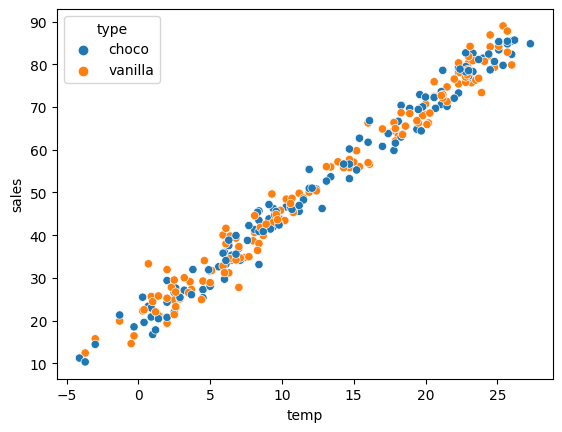

In [5]:
sns.scatterplot(df_train,x='temp',y='sales',hue='type')

# 4. 적합

In [6]:
# step1 -- pass
# step2
predictr = TabularPredictor(label='sales')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231203_074129/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231203_074129/"
AutoGluon Version:  0.8.2
Python Version:     3.8.18
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   673.31 GB / 982.82 GB (68.5%)
Train Data Rows:    280
Train Data Columns: 2
Label Column: sales
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (88.99437629756306, 10.335207096486446, 51.10189, 21.16757)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data

[1000]	valid_set's rmse: 3.11194


	-2.9027	 = Validation score   (-root_mean_squared_error)
	0.19s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: CatBoost ...
	-2.7878	 = Validation score   (-root_mean_squared_error)
	0.22s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-2.88	 = Validation score   (-root_mean_squared_error)
	0.19s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-2.6541	 = Validation score   (-root_mean_squared_error)
	0.89s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: XGBoost ...
	-3.061	 = Validation score   (-root_mean_squared_error)
	0.07s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-2.6289	 = Validation score   (-root_mean_squared_error)
	0.6s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge ...
	-2.9062	 = Validation score   (-root_mean_squared_error)
	0.18s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting

<AxesSubplot: xlabel='temp', ylabel='sales'>

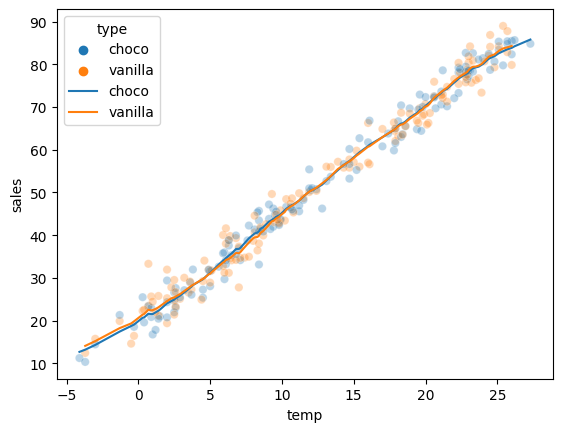

In [7]:
sns.scatterplot(df_train,x='temp',y='sales',hue='type',alpha=0.3)
sns.lineplot(df_train,x='temp',y=yhat,hue='type')

In [8]:
predictr.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-2.561803,0.029295,1.844234,0.000218,0.150833,2,True,12
1,NeuralNetTorch,-2.628865,0.002556,0.603938,0.002556,0.603938,1,True,10
2,NeuralNetFastAI,-2.654070,0.004787,0.889270,0.004787,0.889270,1,True,8
3,KNeighborsUnif,-2.731556,0.006626,0.011376,0.006626,0.011376,1,True,1
4,CatBoost,-2.787790,0.000773,0.223884,0.000773,0.223884,1,True,6
5,ExtraTreesMSE,-2.879997,0.015717,0.192446,0.015717,0.192446,1,True,7
6,RandomForestMSE,-2.902703,0.015109,0.188818,0.015109,0.188818,1,True,5
7,LightGBMLarge,-2.906174,0.000660,0.182818,0.000660,0.182818,1,True,11
8,XGBoost,-3.061021,0.001390,0.066261,0.001390,0.066261,1,True,9
9,LightGBM,-3.086423,0.000620,0.123639,0.000620,0.123639,1,True,4


# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
sales,280,51.101886,21.167573,10.335207,33.053077,47.844021,70.451589,88.994376,float64,280,,,float,


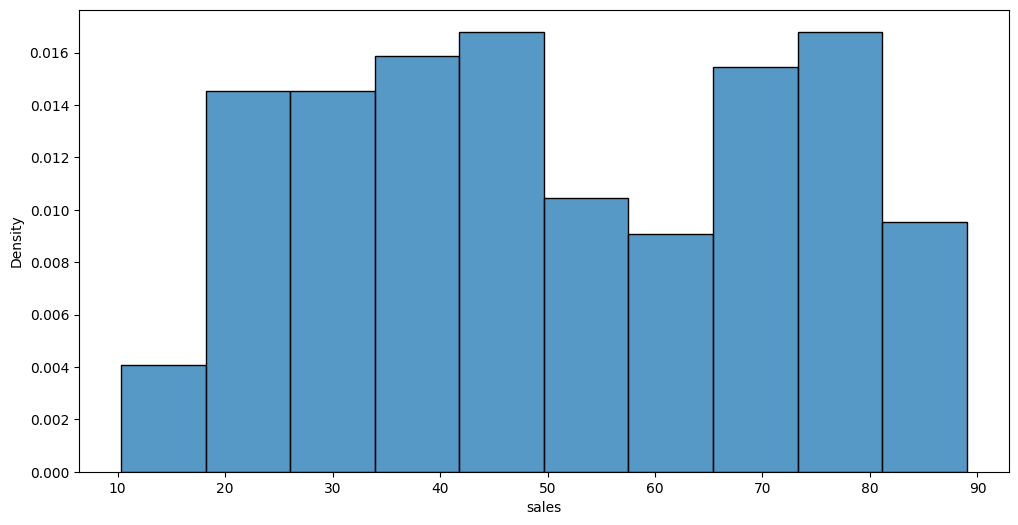

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `sales` >= `0.5`**

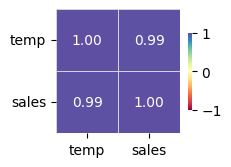

**Feature interaction between `temp`/`sales` in `train_data`**

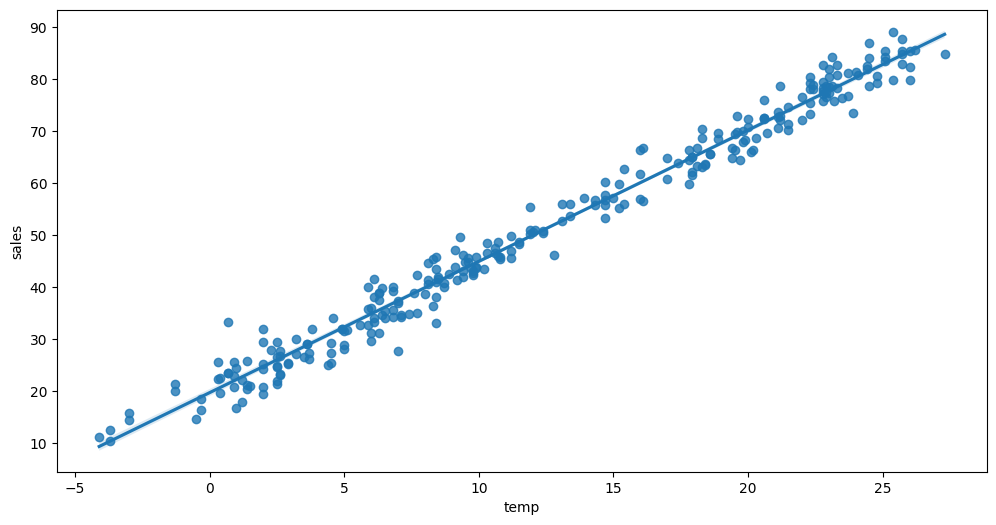

In [9]:
auto.target_analysis(
    train_data=df_train,
    label='sales',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231203_074133/"


### Model Prediction for sales

Using validation data for `Test` points

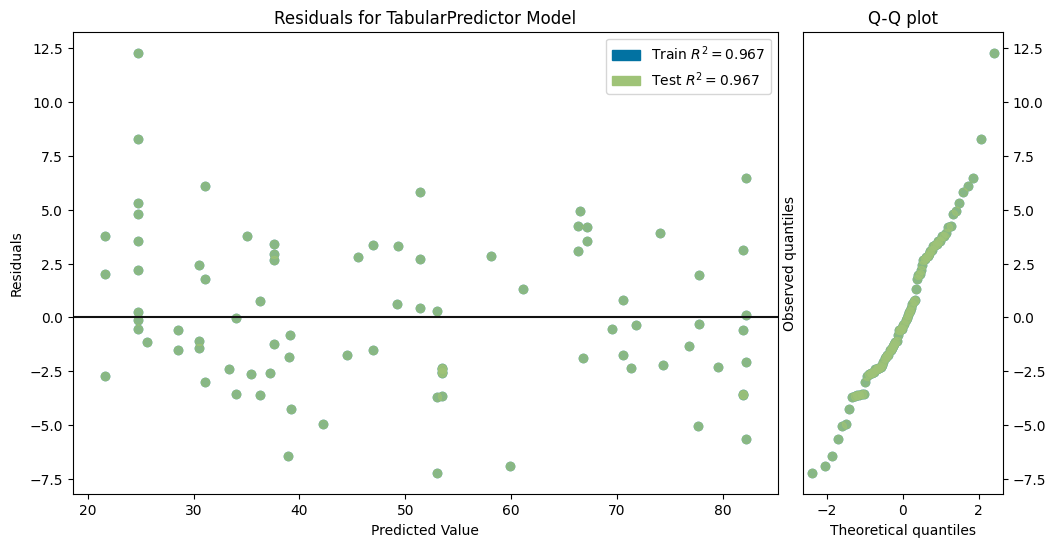

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-3.549018,-4.206044,0.002413,0.00081,0.149133,0.002413,0.00081,0.149133,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
temp,25.164809,1.617020,0.000002,5,28.494276,21.835342
type,-0.048470,0.059119,0.929654,5,0.073258,-0.170197


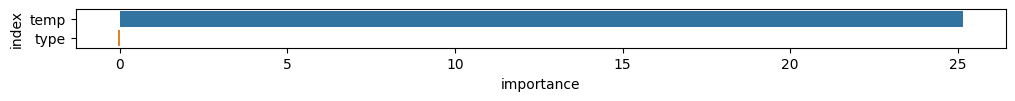

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,temp,type,sales,sales_pred,error
73,-3.7,vanilla,12.432354,24.724379,12.292025
191,-0.3,vanilla,16.436525,24.724379,8.287854
218,14.7,choco,60.178468,52.961044,7.217424
166,16.1,choco,66.821367,59.932861,6.888506
5,23.2,vanilla,75.697957,82.155197,6.457240
118,8.3,choco,45.364110,38.923119,6.440991
198,4.4,vanilla,24.924572,31.039103,6.114530
7,11.2,choco,45.593168,51.416027,5.822859
89,25.7,vanilla,87.788320,82.155197,5.633123
109,2.0,vanilla,19.398204,24.724379,5.326174


In [10]:
auto.quick_fit(
    train_data=df_train,
    label='sales',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석

,temp,type,sales
0,19.4,choco,64.807407


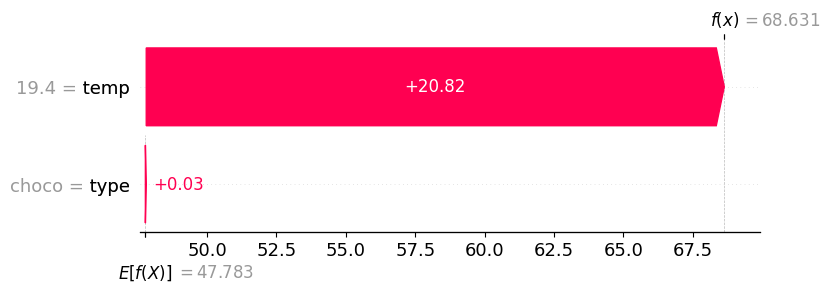

In [11]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[0]],
    display_rows=True,
    plot='waterfall'
)   

,temp,type,sales
1,0.9,vanilla,25.656697


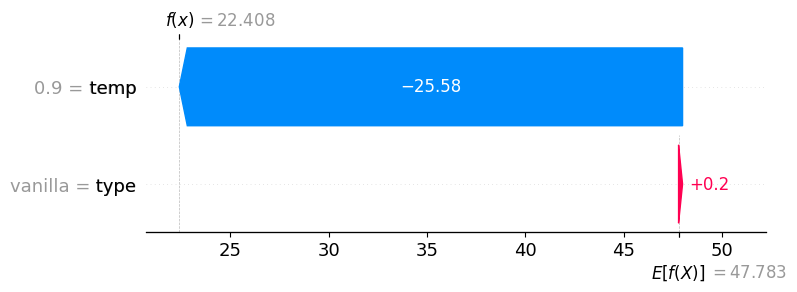

In [12]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[1]],
    display_rows=True,
    plot='waterfall'
)   